In [1]:
from ib_insync import *
import pandas as pd
import ib_connection as IBC
import numpy as np
import big_graphs as BG
from Records import Records

util.startLoop()
ibc, ib = IBC.quick_connect()

open orders request timed out
completed orders request timed out


In [ ]:
# all universes: "mega_cap", "industrial", "materials", "transport", "utilities", "banks"

r = Records()
r.tickers = IBC.show_universe("mega_tech")
r.dur = "15 Y"
r.size = "1 day"
r.t = 252 * 2  # training days
r.long_window = 400  # rolling windows for betas
r.short_window = 60



===== Running universe: mega_tech (56 names) =====
Universe:mega_tech
Description : 
  Mega-cap and large-cap US equities with strong technology tilt (long history, high liquidity, tech-driven behavior)
Tickers (56):
  AAPL, MSFT, AMZN, GOOGL, META, NVDA, AMD, INTC, QCOM, AVGO, ORCL, IBM, CSCO, ADBE, CRM, INTU, SAP, ACN, CTSH, TXN, ADI, MU, NXPI, MCHP, AMAT, LRCX, KLAC, TER, GLW, APH, HPQ, HPE, NTAP, WDC, STX, NFLX, EBAY, DIS, CMCSA, V, MA, PYPL, ADP, CME, ICE, NDAQ, JPM, BAC, GS, MS, XOM, CVX, JNJ, UNH, PG, KO


In [ ]:
# Phase 1: fetch companies returns only (shared across variants)
r.fetch_comp(ib, progress=False)

# Create variants AFTER fetch_comp so they inherit/shared the companies returns
r_spy = r.copy(mkt_ticker="SPY")
r_qqq = r.copy(mkt_ticker="QQQ")

# Phase 2: fetch market returns per variant (market cache key depends on mkt_ticker and mkt_params)
r_spy.fetch_mkt(ib, progress=False)
r_qqq.fetch_mkt(ib, progress=False)

# Downstream code should use r.returns and r.mkt_ret (no combined df stored).

[cache] MISS companies=True mkt=True at=2026-01-02 16:09:47


Fetching adjusted close: 100%|██████████| 56/56 [06:48<00:00,  7.30s/ticker]


[cache] writing... path=cache\companies\3f90d6e693d3c9f01d30da7a32d20911.pkl at=2026-01-02 16:16:38
[cache] WRITE path=cache\companies\3f90d6e693d3c9f01d30da7a32d20911.pkl write_sec=0.058 at=2026-01-02 16:16:38
[cache] writing... path=cache\mkt\086ba14518992e520f03cb64e1bba70e.pkl at=2026-01-02 16:16:50
[cache] WRITE path=cache\mkt\086ba14518992e520f03cb64e1bba70e.pkl write_sec=0.002 at=2026-01-02 16:16:50
[cache] DONE companies_cached=True mkt_cached=True api_sec=411.141 spy_sec=11.956 assemble_sec=0.002 total_sec=423.160 at=2026-01-02 16:16:50
len(returns) = 2493
len(spy_ret) = 2493
len(df)      = 2493
t            = 504
df range     = 2016-02-03 -> 2026-01-02


In [4]:
r.set_static_beta_alpha_residual()
r.set_short_beta_alpha()
r.set_long_beta_alpha()
print("betas done")

betas done


In [5]:
import residual_signal as RS
sig_static, z_static = RS.static_residual_signal(r)
sig_modified, z_modified = RS.modified_residual_signal(r, lamb_hi=0.4, lamb_lo=0.1, gamma=1.0)

sharpe_gross =  0.27083208098029976
sharpe_net =  -0.006587589355969694
mean turnover: 3.6219205630970337
cost.sum() =  0.7204000000000002
equity_net.iloc[-1] =  0.6417328454956663


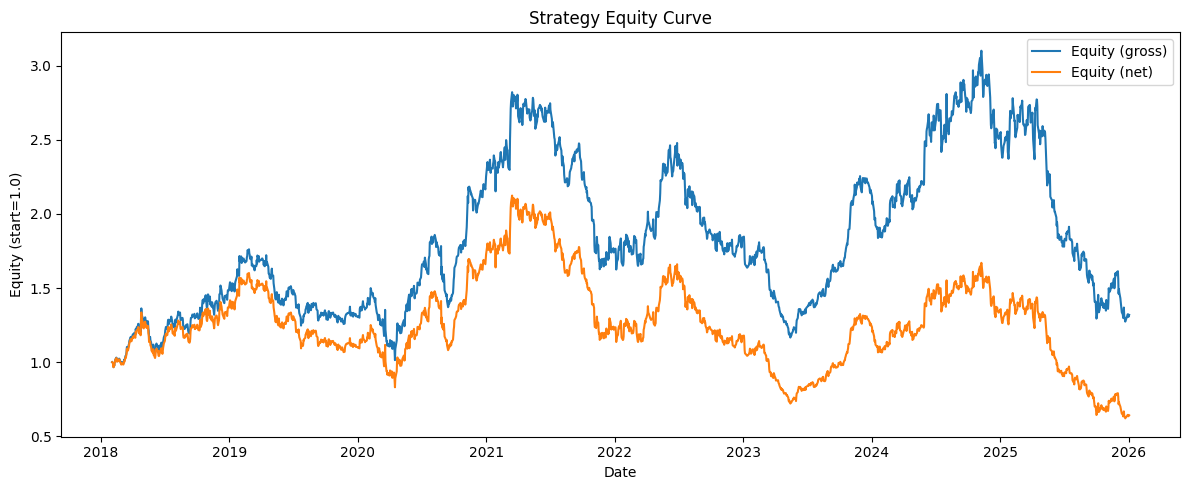

sharpe_gross =  0.04348984795679834
sharpe_net =  -0.24055751214205212
mean turnover: 3.6262778615719795
cost.sum() =  0.7212666666666667
equity_net.iloc[-1] =  0.36081875221222737


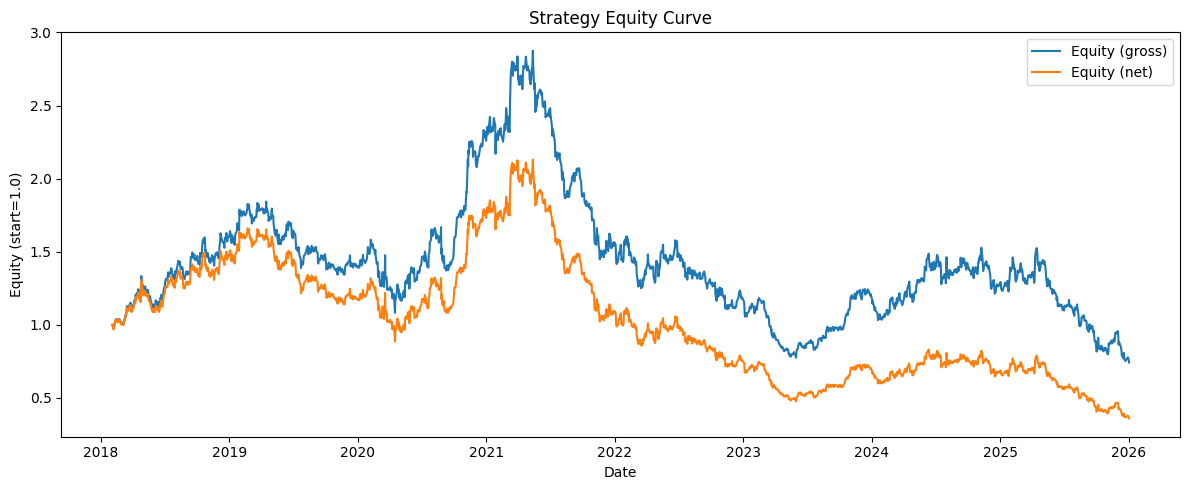

sharpe_gross =  -0.223508436496838
sharpe_net =  -0.4548139977491182
mean turnover: 1.8183497442562524
cost.sum() =  0.3616697641325687
equity_net.iloc[-1] =  0.4202332506074829


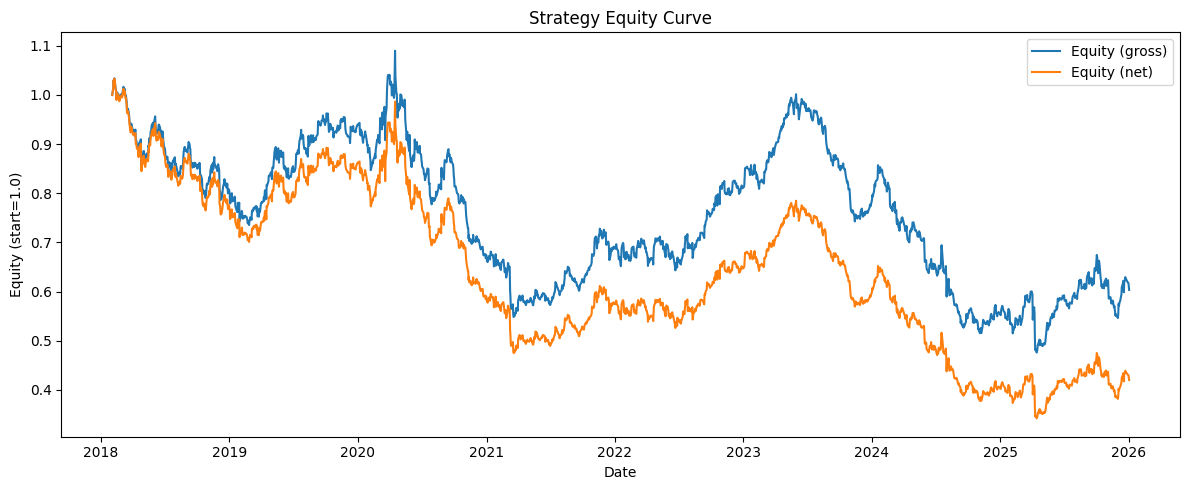

sharpe_gross =  -0.01616174855725362
sharpe_net =  -0.24689157555791097
mean turnover: 1.8125847734332214
cost.sum() =  0.3605231114358678
equity_net.iloc[-1] =  0.5822136400859903


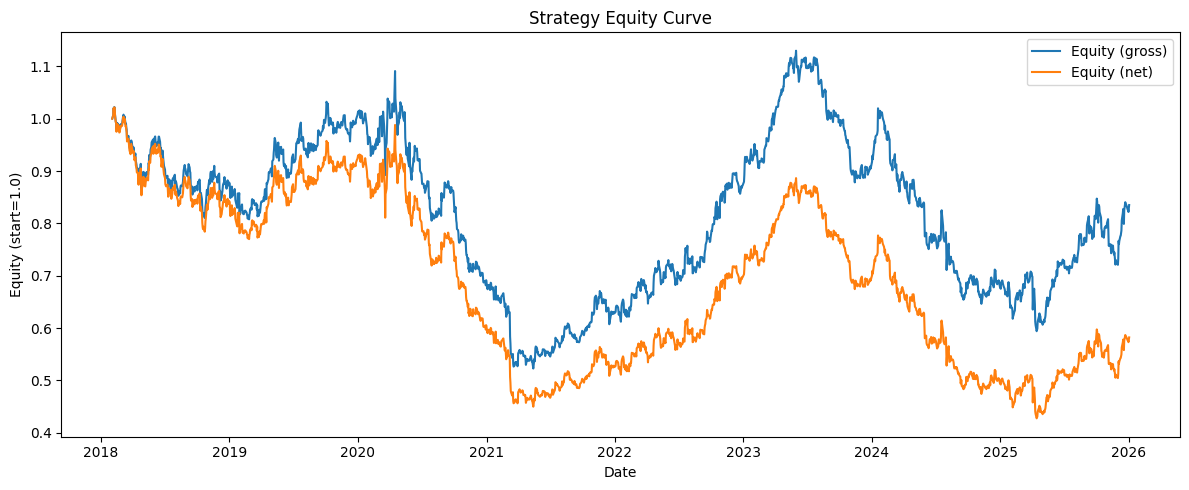

active_ratio =  0.13172448466566114
sharpe_gross =  0.5217232418595341
sharpe_net =  0.4846375137196147
mean turnover: 0.2564102564102564
cost.sum() =  0.051000000000000004
equity_net.iloc[-1] =  1.727635114733142


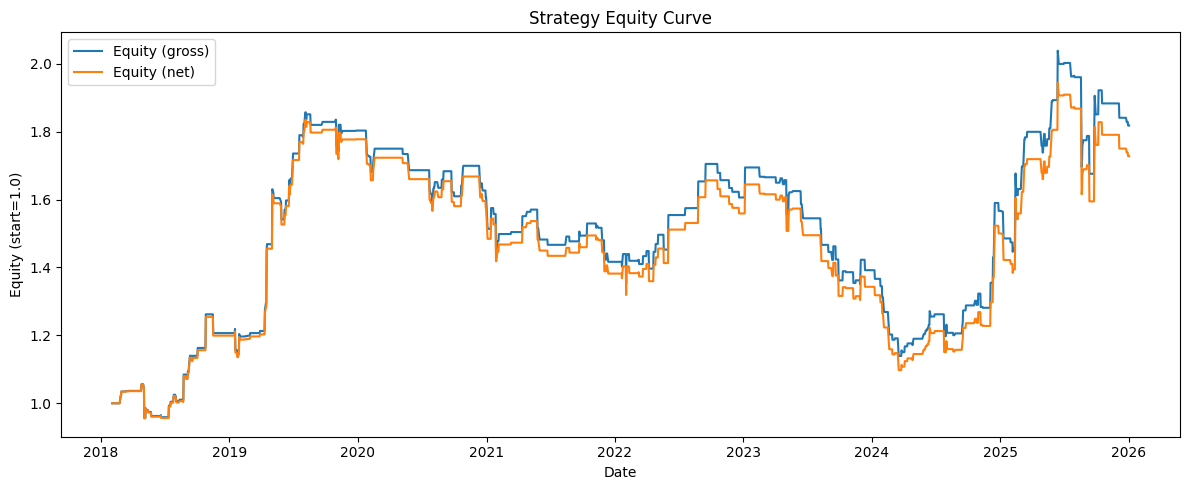

active_ratio =  0.14228255404725992
sharpe_gross =  0.8283107163575617
sharpe_net =  0.7877891541114971
mean turnover: 0.2815485168426345
cost.sum() =  0.05600000000000001
equity_net.iloc[-1] =  2.6152940450298936


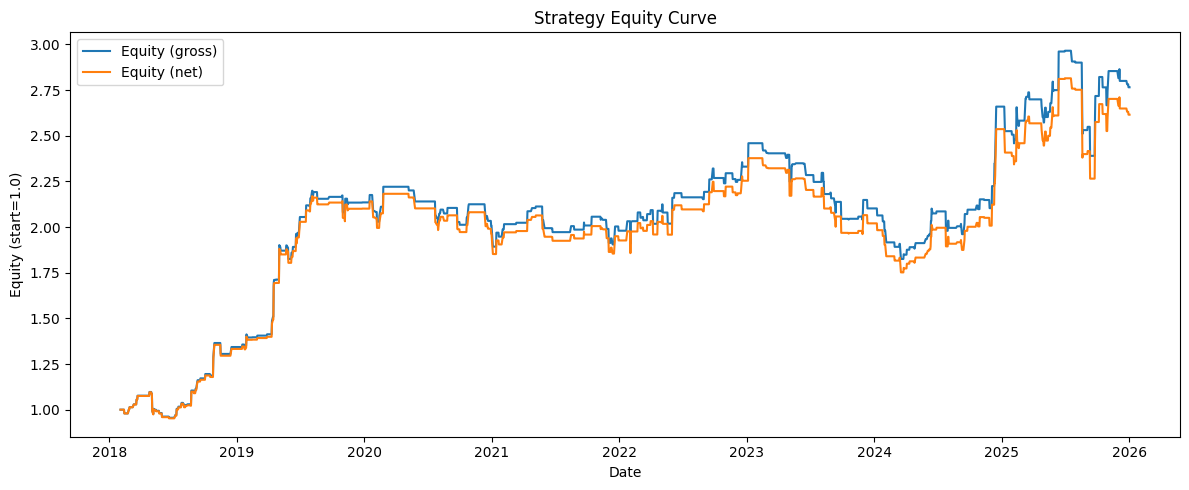

pnl done


In [6]:
equity_gross, equity_net = r.pnl_trading(RS.topk_signal_to_weights(r, sig_static, 3), tc_bps=1.0)
BG.plot_equity(equity_gross, equity_net, title="Strategy Equity Curve")
equity_gross, equity_net = r.pnl_trading(RS.topk_signal_to_weights(r, sig_modified, 3), tc_bps=1.0)
BG.plot_equity(equity_gross, equity_net, title="Strategy Equity Curve")
equity_gross, equity_net = r.pnl_trading(RS.modified_topk_signal_to_weights(r, sig_static, z_static, 3), tc_bps=1.0)
BG.plot_equity(equity_gross, equity_net, title="Strategy Equity Curve")
equity_gross, equity_net = r.pnl_trading(RS.modified_topk_signal_to_weights(r, sig_modified, z_modified, 3), tc_bps=1.0)
BG.plot_equity(equity_gross, equity_net, title="Strategy Equity Curve")

equity_gross, equity_net = r.pnl_trading(RS.extreme_signal_to_weights(r, sig_static, z_static), tc_bps=1.0)
BG.plot_equity(equity_gross, equity_net, title="Strategy Equity Curve")
equity_gross, equity_net = r.pnl_trading(RS.extreme_signal_to_weights(r, sig_modified, z_modified), tc_bps=1.0)
BG.plot_equity(equity_gross, equity_net, title="Strategy Equity Curve")
print("pnl done")

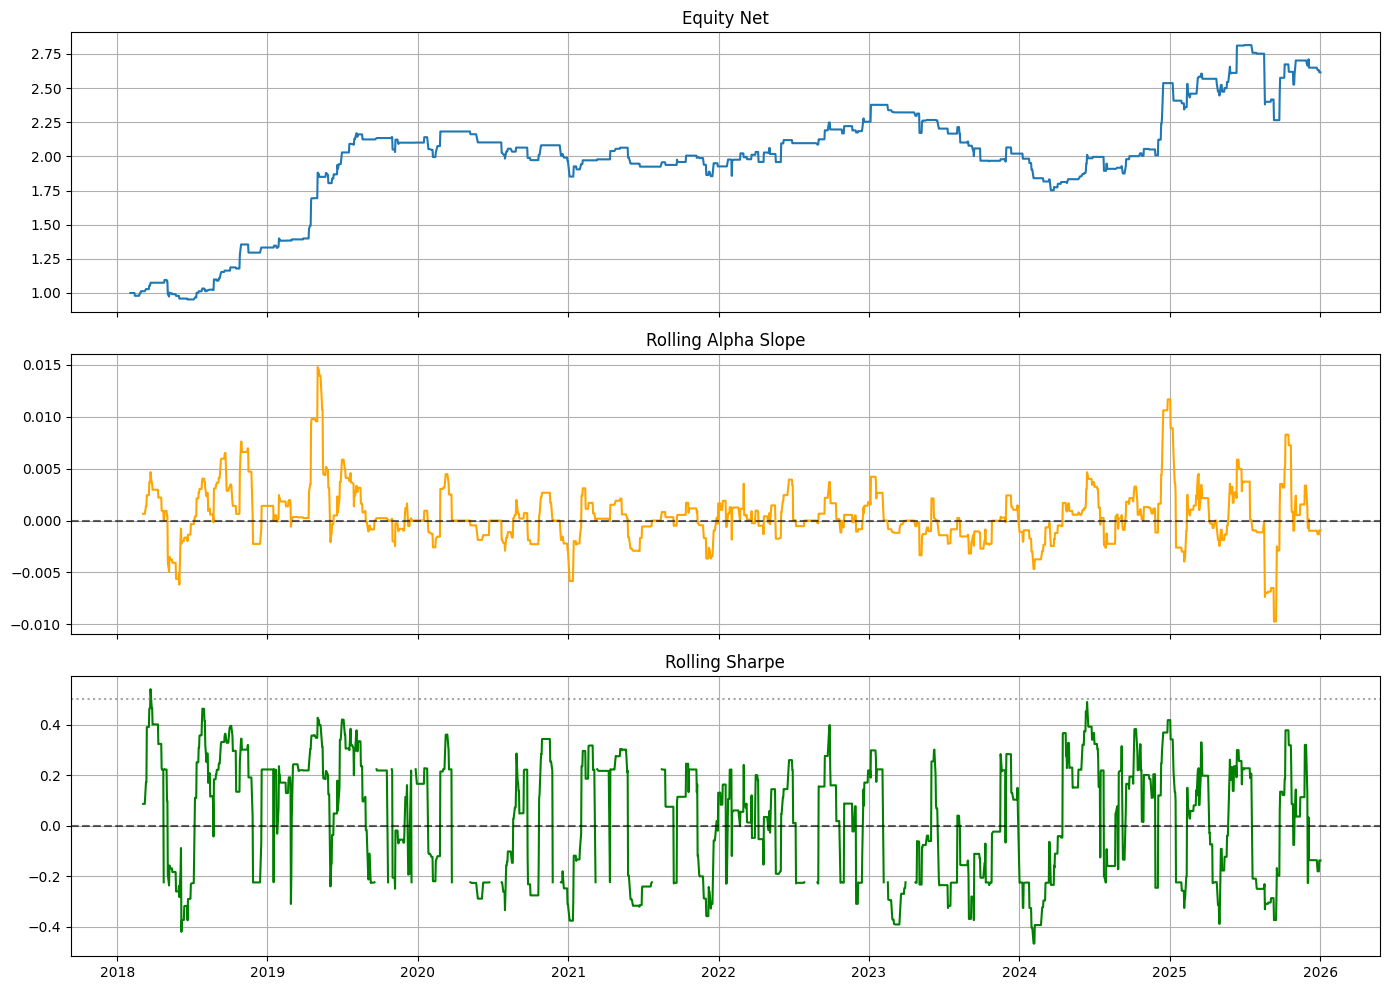

In [7]:
BG.plot_alpha_diff_diagnostics(equity_net, W=20, title_prefix="")